In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* 약 39,000 -> 약 32,000.
* 총 7,000개 손실.

In [3]:
df = pd.read_csv('/content/MyDrive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/train_v2(결측_이상).csv')
df.shape

(32333, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32333 entries, 0 to 32332
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE_GRP                32333 non-null  float64
 1   GENDER                 32333 non-null  object 
 2   TRAVEL_MONTH           32333 non-null  int64  
 3   TRAVEL_PERIOD          32333 non-null  int64  
 4   NTvsCT                 32333 non-null  int64  
 5   EXPLODvsCHPLOD         32333 non-null  int64  
 6   RESTvsACT              32333 non-null  int64  
 7   UNKvsK                 32333 non-null  int64  
 8   MVMN_NM                32333 non-null  object 
 9   TRAVEL_MISSION_CHECK1  32333 non-null  object 
 10  TRAVEL_MISSION_CHECK2  32333 non-null  object 
 11  TRAVEL_MOTIVE_1        32333 non-null  object 
 12  TRAVEL_MOTIVE_2        32333 non-null  object 
 13  TRAVEL_MOTIVE_3        32333 non-null  object 
 14  budget                 32333 non-null  float64
 15  VI

In [5]:
df.groupby('TRAVEL_PERIOD')['budget'].mean()

,budget
TRAVEL_PERIOD,
1,60905.612806
2,176539.144715
3,281545.700253
4,473300.135419
5,567580.601757
6,765804.807780
7,676148.765073
8,725571.389439


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


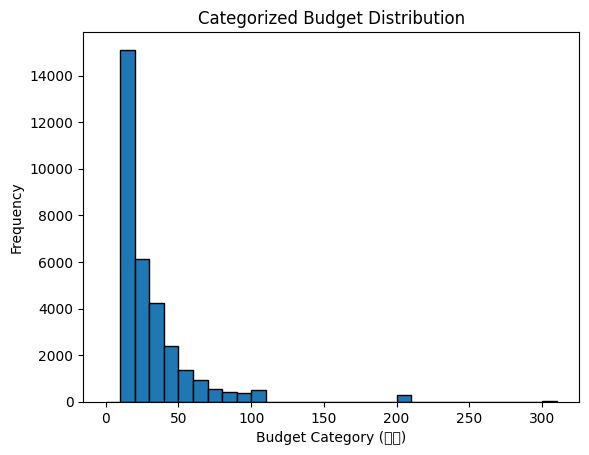

In [6]:
def categorize_budget(budget):
    if budget < 100000:
        return 10  # 10만원 미만은 10으로 고정
    elif budget < 1000000:
        return int(round(budget / 100000) * 10)  # 10만원 단위로 반올림 후 정수형 반환
    else:
        return int(round(budget / 1000000) * 100)  # 100만원 단위로 반올림 후 정수형 반환

categorized_budgets = [categorize_budget(budget) for budget in df['budget']]

# 히스토플롯 생성
plt.hist(categorized_budgets, bins=np.arange(min(categorized_budgets) - 10, max(categorized_budgets) + 20, 10), edgecolor='black')
plt.xlabel('Budget Category (만원)')
plt.ylabel('Frequency')
plt.title('Categorized Budget Distribution')
plt.show()

* 박스콕스 변환

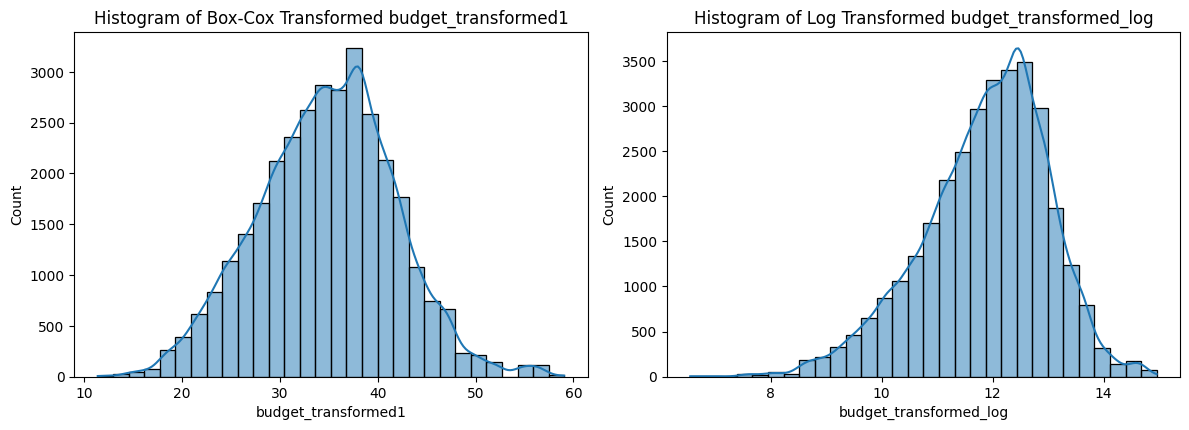

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 로그 변환
df['budget_transformed_log'] = np.log(df['budget'] + 1)  # 0 이상의 값을 보장하기 위해 +1 추가

# 히스토그램 시각화
plt.figure(figsize=(12, 8))

# Box-Cox 변환 히스토그램 (budget_transformed1)
plt.subplot(2, 2, 1)
sns.histplot(df['budget_transformed1'], bins=30, kde=True)
plt.title('Histogram of Box-Cox Transformed budget_transformed1')
plt.xlabel('budget_transformed1')

# 로그 변환 히스토그램 (budget_transformed_log)
plt.subplot(2, 2, 2)
sns.histplot(df['budget_transformed_log'], bins=30, kde=True)
plt.title('Histogram of Log Transformed budget_transformed_log')
plt.xlabel('budget_transformed_log')

plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import skew, kurtosis

boxcox_skewness = skew(df['budget_transformed1'])
boxcox_kurtosis = kurtosis(df['budget_transformed1'])

log_skewness = skew(df['budget_transformed_log'])
log_kurtosis = kurtosis(df['budget_transformed_log'])

print("Box-Cox Transformed Budget:")
print(f"Skewness: {boxcox_skewness:.4f}, Kurtosis: {boxcox_kurtosis:.4f}\n")

print("Log Transformed Budget:")
print(f"Skewness: {log_skewness:.4f}, Kurtosis: {log_kurtosis:.4f}\n")

Box-Cox Transformed Budget:
Skewness: -0.0022, Kurtosis: 0.0293

Log Transformed Budget:
Skewness: -0.5355, Kurtosis: 0.3798



# 수치형 시각화

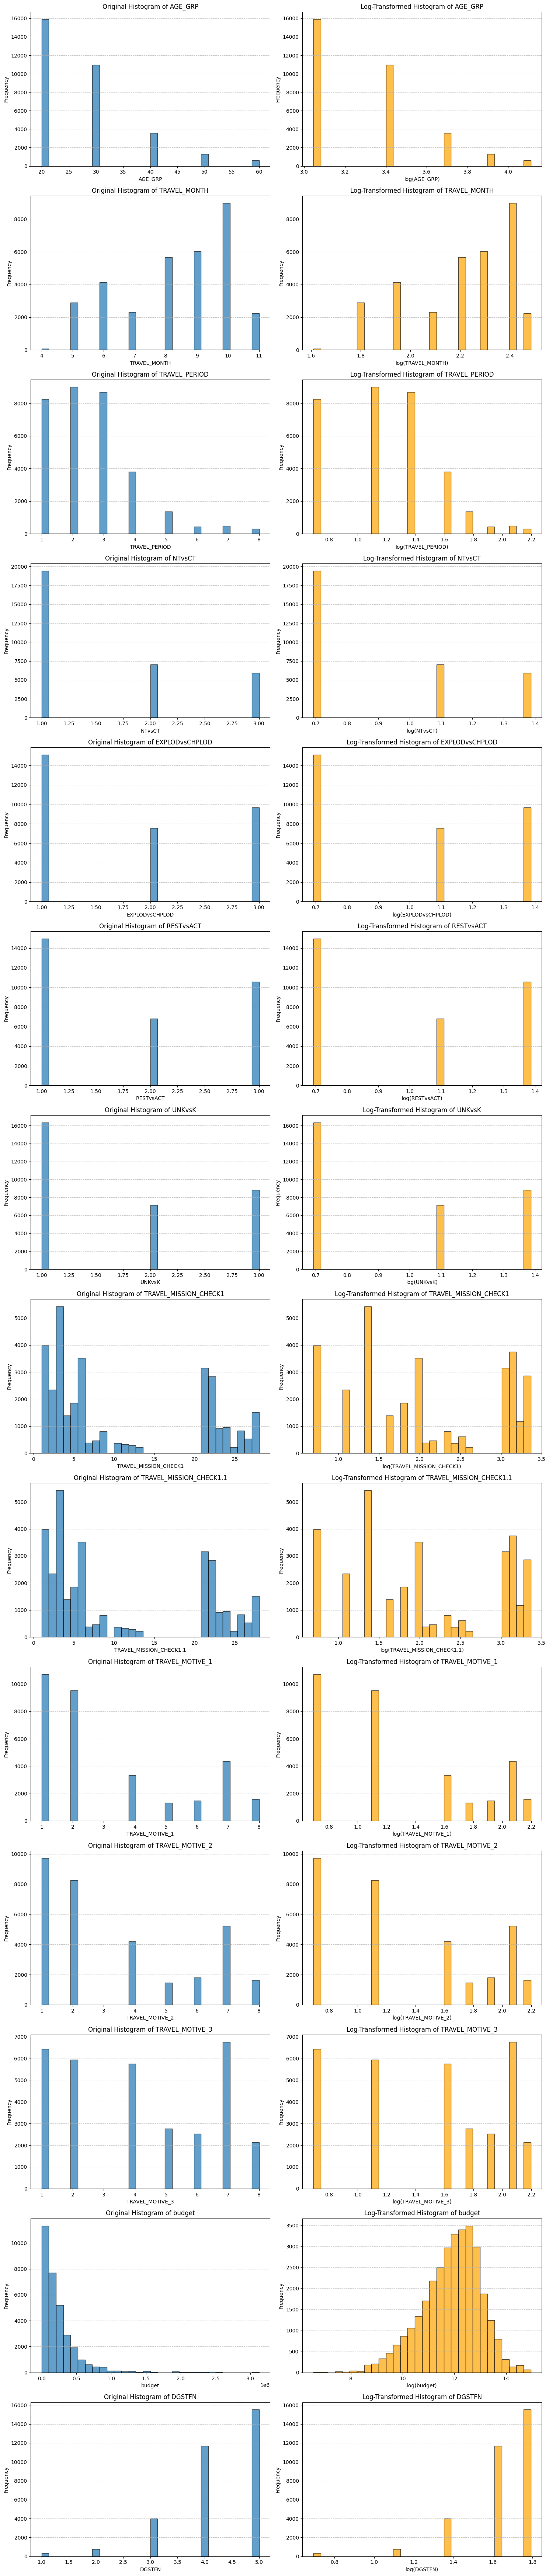

In [ ]:
def plot_all_numeric_histograms(df, bins=30):
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Exclude 'Unnamed: 0', 'X_COORD', and 'Y_COORD' columns if they exist
    numeric_columns = [col for col in numeric_columns if col not in ['X_COORD', 'Y_COORD']]

    if len(numeric_columns) == 0:
        print("Error: No numeric columns found in the DataFrame.")
        return

    # Set up a grid layout for the plots
    n_cols = 2
    n_rows = int(np.ceil(len(numeric_columns) * 2 / n_cols))  # Each column will have original and log-transformed plots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    plot_idx = 0
    # Plot original and log-transformed histograms side by side for each numeric column
    for column in numeric_columns:
        # Original histogram
        ax = axes[plot_idx]
        df[column].plot(kind='hist', bins=bins, edgecolor='black', alpha=0.7, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Original Histogram of {column}')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        plot_idx += 1

        # Log-transformed histogram
        if df[column].min() > 0:
            ax = axes[plot_idx]
            log_transformed = np.log1p(df[column])
            log_transformed.plot(kind='hist', bins=bins, edgecolor='black', alpha=0.7, ax=ax, color='orange')
            ax.set_xlabel(f'log({column})')
            ax.set_ylabel('Frequency')
            ax.set_title(f'Log-Transformed Histogram of {column}')
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            plot_idx += 1

    # Hide any unused subplots
    for i in range(plot_idx, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

plot_all_numeric_histograms(df, bins=30)

수치 - 히스토, 범주 - 파이차트

# 범주형 시각화

## 한글 폰트 설정

In [ ]:
# # 한글 폰트 설치
# !apt-get -qq install fonts-nanum

# # 폰트 캐시를 삭제하고 다시 생성하기 위해 런타임 재시작 필요
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import os

# # 폰트 캐시 파일 삭제
# !rm -rf /root/.cache/matplotlib/*

# # 런타임 재시작 명령어 (이 코드 실행 후 런타임을 다시 시작하고 이후 코드를 실행)
# os.kill(os.getpid(), 9)

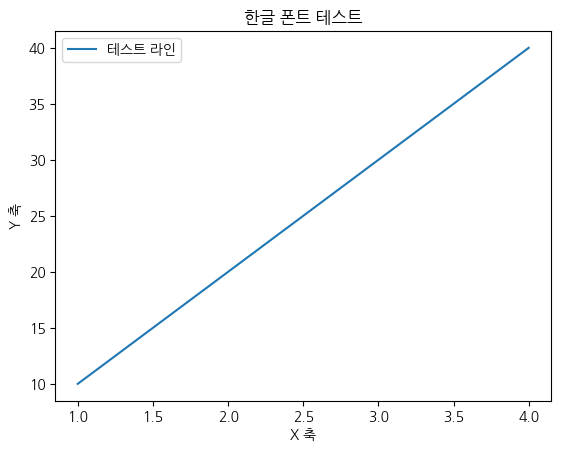

In [ ]:
# matplotlib 및 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 'NanumGothic' 설정
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

# 샘플 그래프
plt.title('한글 폰트 테스트')
plt.plot([1, 2, 3, 4], [10, 20, 30, 40], label='테스트 라인')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.legend()
plt.show()

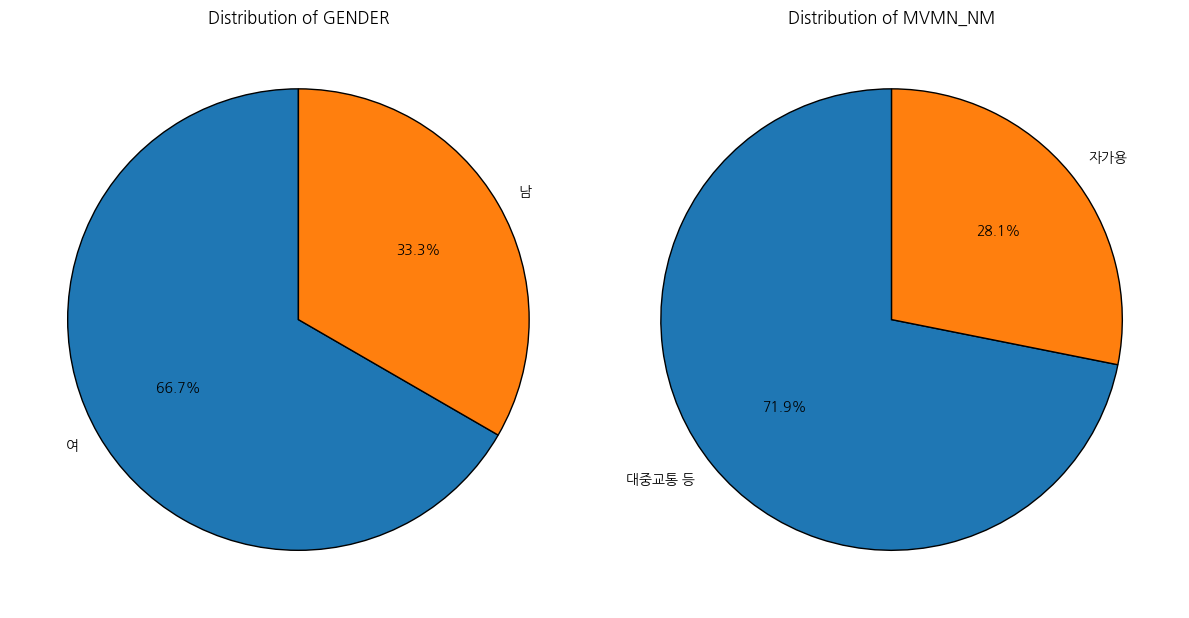

In [ ]:
# Define the columns to be considered for pie charts
categorical_columns = [ "GENDER", "MVMN_NM"]

# Plot pie charts for each categorical column in a single figure
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    df[column].value_counts().plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_ylabel("")  # Hide y-axis label

plt.tight_layout()
plt.show()

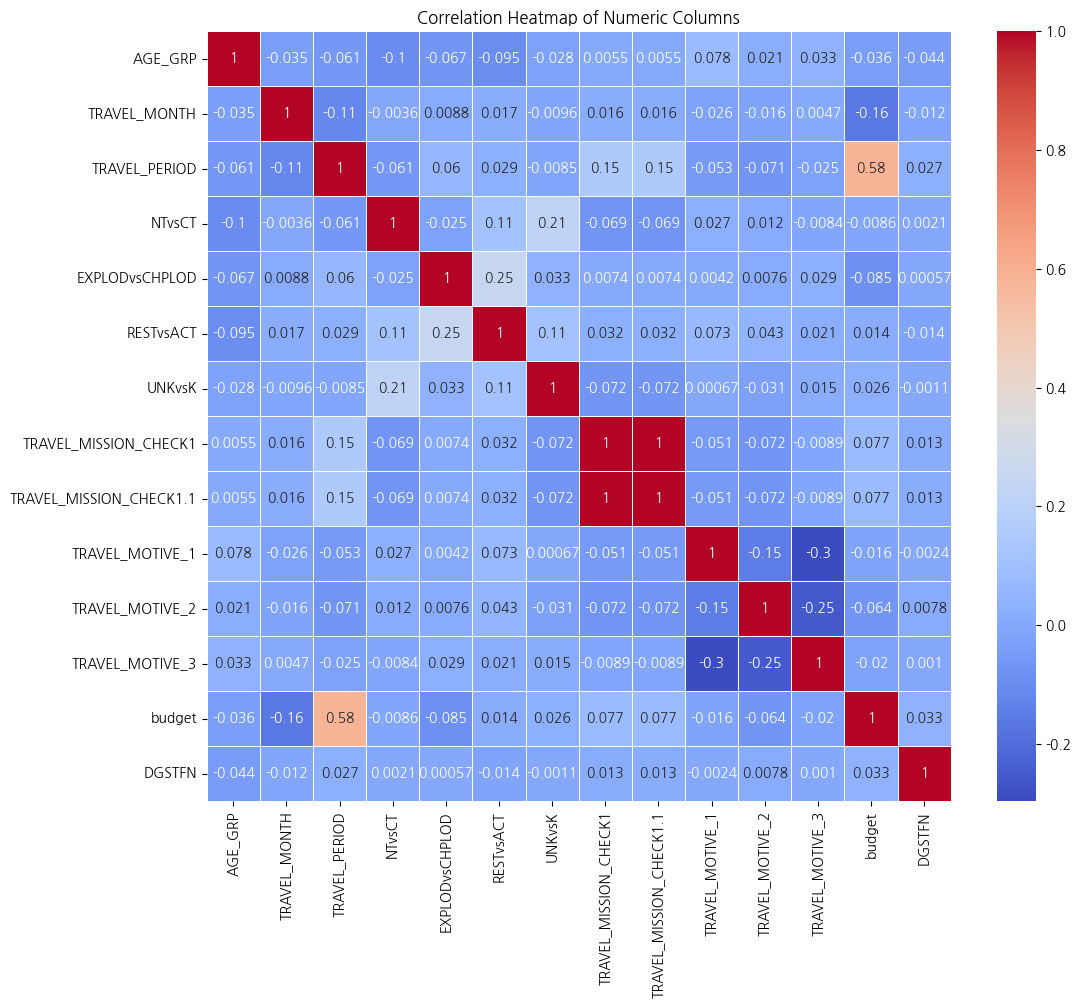

In [ ]:
def plot_numeric_heatmap(df):
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Exclude 'Unnamed: 0', 'X_COORD', and 'Y_COORD' columns if they exist
    numeric_columns = [col for col in numeric_columns if col not in ['X_COORD', 'Y_COORD']]

    if len(numeric_columns) == 0:
        print("Error: No numeric columns found in the DataFrame.")
        return

    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Numeric Columns')
    plt.show()
plot_numeric_heatmap(df)

---

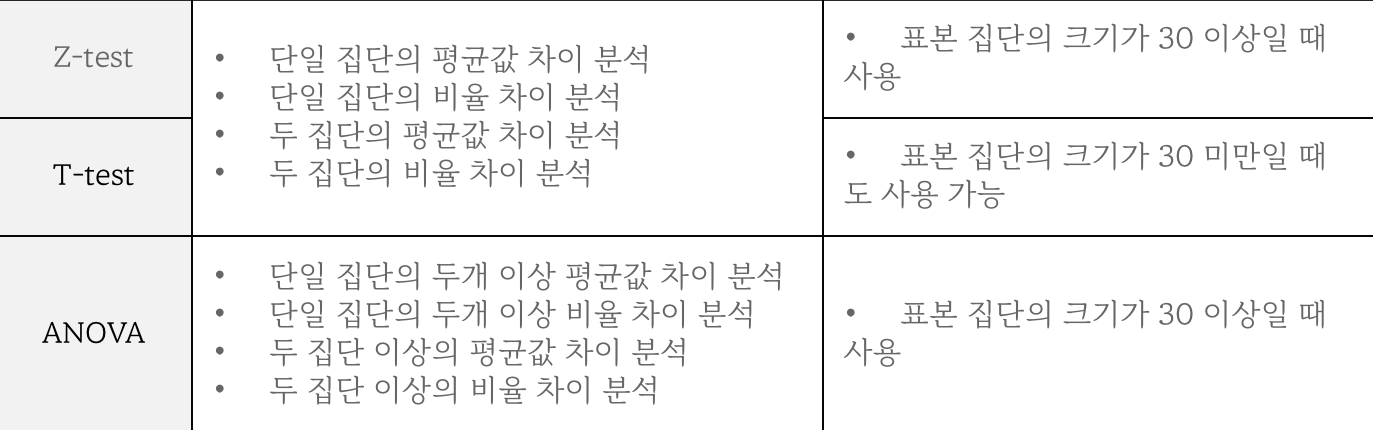

# 재차

In [ ]:
df_dr = df.drop(columns = ['X_COORD', 'Y_COORD',])
df_dr.describe()

,AGE_GRP,TRAVEL_MONTH,TRAVEL_PERIOD,NTvsCT,EXPLODvsCHPLOD,RESTvsACT,UNKvsK,budget,DGSTFN
count,32333.000000,32333.000000,32333.000000,32333.000000,32333.000000,32333.000000,32333.000000,3.233300e+04,32333.000000
mean,27.554511,8.344261,2.559707,1.581635,1.832308,1.863452,1.768255,2.471616e+05,4.276714
std,9.344029,1.797381,1.409657,0.779742,0.859209,0.877999,0.851648,2.899613e+05,0.848240
min,20.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000e+02,1.000000
25%,20.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.215000e+04,4.000000
50%,30.000000,9.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.630000e+05,4.000000
75%,30.000000,10.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.137000e+05,5.000000
max,60.000000,11.000000,8.000000,3.000000,3.000000,3.000000,3.000000,3.125157e+06,5.000000


In [ ]:
value_counts = df_dr['TRAVEL_PERIOD'].value_counts()
percentage_counts = (value_counts / len(df_dr)) * 100

3박 이상의 비율이 17,259 ,

In [ ]:
percentage_counts

,count
TRAVEL_PERIOD,
2,27.826060
3,26.858009
1,25.552841
4,11.761977
5,4.224786
7,1.487644
6,1.351560
8,0.937123


In [ ]:
df_long_p = df_dr.loc[df_dr['TRAVEL_PERIOD'] <= 2]
df_short_p = df_dr.loc[df_dr['TRAVEL_PERIOD'] > 2]

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# 두 그룹의 데이터 크기 계산
long_stay_count = len(df_long_p)
short_stay_count = len(df_short_p)

# 빈도표 생성
frequency_table = pd.DataFrame({
    '2박 이하': [long_stay_count],
    '2박 초과': [short_stay_count]
})

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(frequency_table)

# 결과 출력
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 0
Expected frequencies: [[17259. 15074.]]


In [ ]:
# 구간 기준
thresholds = [200000, 400000, 600000]

# 비율 계산 함수
def calculate_ratio(df, threshold):
    below = len(df[df['budget'] <= threshold])
    above = len(df[df['budget'] > threshold])
    total = below + above
    return (below / total) * 100, (above / total) * 100

# 각 기준에 대한 비율 계산
ratios = {f"{th} KRW 기준": calculate_ratio(df_dr, th) for th in thresholds}

# 결과 출력
for threshold, (below_ratio, above_ratio) in ratios.items():
    print(f"{threshold}: {below_ratio:.2f}% (이하), {above_ratio:.2f}% (이상)")

200000 KRW 기준: 57.14% (이하), 42.86% (이상)
400000 KRW 기준: 82.47% (이하), 17.53% (이상)
600000 KRW 기준: 92.07% (이하), 7.93% (이상)


In [ ]:
import pandas as pd

# TRAVEL_PERIOD별로 budget 요약 통계 계산
grouped_budget_stats = df_dr.groupby('TRAVEL_PERIOD')['budget'].describe()

# 결과 출력
print(grouped_budget_stats)

                count           mean            std       min       25%  \
TRAVEL_PERIOD                                                             
1              8262.0   60905.612806   58870.385643     700.0   23800.0   
2              8997.0  176539.144715  162543.003286    1900.0   88500.0   
3              8684.0  281545.700253  247953.366359    5100.0  144600.0   
4              3803.0  473300.135419  372035.895642   33700.0  250600.0   
5              1366.0  567580.601757  396911.818157   59200.0  311200.0   
6               437.0  765804.807780  605123.045640   71500.0  411450.0   
7               481.0  676148.765073  292304.177681  215900.0  467364.0   
8               303.0  725571.389439  284283.492149  104000.0  383750.0   

                    50%       75%        max  
TRAVEL_PERIOD                                 
1               45600.0   78000.0   829800.0  
2              143500.0  226662.0  3125157.0  
3              230530.0  338070.0  2577300.0  
4             

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

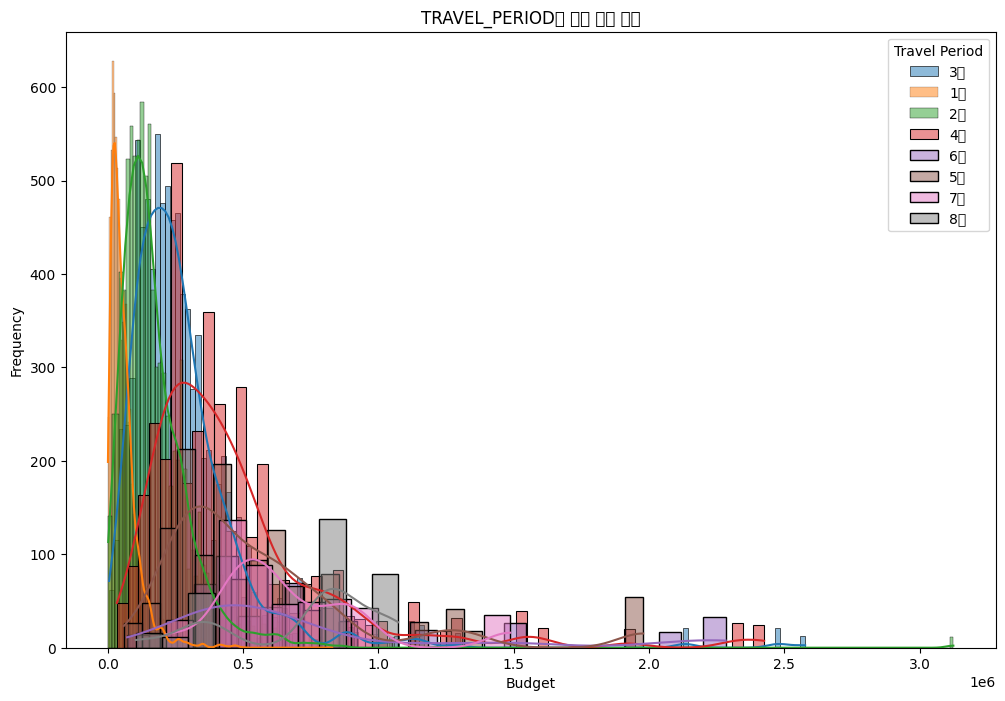

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 여행 기간에 따른 예산 분포 히스토그램 생성
unique_periods = df_dr['TRAVEL_PERIOD'].unique()
plt.figure(figsize=(12, 8))

for period in unique_periods:
    subset = df_dr[df_dr['TRAVEL_PERIOD'] == period]
    sns.histplot(subset['budget'], kde=True, label=f'{period}일')

plt.title('TRAVEL_PERIOD에 따른 예산 분포')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.legend(title='Travel Period')
plt.show()

In [ ]:
df_dr.loc[df_dr['budget'] >= 1000000].value_counts()

AGE_GRP  GENDER  TRAVEL_MONTH  TRAVEL_PERIOD  NTvsCT  EXPLODvsCHPLOD  RESTvsACT  UNKvsK  MVMN_NM  TRAVEL_MISSION_CHECK1  TRAVEL_MISSION_CHECK2  TRAVEL_MOTIVE_1                TRAVEL_MOTIVE_2                TRAVEL_MOTIVE_3                budget     VISIT_AREA_NM     DGSTFN  ROAD_NM_ADDR                LOTNO_ADDR                
30.0     여       6             3              2       1               3          2       자가용      Well-ness 여행           호캉스 여행                 쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식  일상적인 환경 및 역할에서의 탈출, 지루함 탈피     새로운 경험 추구                      1283200.0  JW 메리어트 제주리조트 스파  5.0     제주특별자치도 서귀포시 태평로 152        제주특별자치도 서귀포시 호근동 399          5
                 8             4              1       1               1          2       대중교통 등   야외 스포츠, 레포츠 활동         호캉스 여행                 일상적인 환경 및 역할에서의 탈출, 지루함 탈피     쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식  새로운 경험 추구                      1525600.0  해비치 호텔&리조트 제주     5.0     제주특별자치도 서귀포시 표선면 민속해안로 537  제주특별자치도 서귀포시 표선면 표선리 40-69    4
                 5             3              2       1               1          3       대중교통 등   시티투어                   호캉스 여행                 운동, 건강 증진 및 충전                 일상적인 환경 및 역할에서의 탈출, 지루함 탈피     새로운 경험 추구                      1165101.0  페어필드 바이 메리어트 부산   4.0     부산 해운대구 해운대해변로 314          부산 해운대구 중동 1400-60            4
                 8             5              1       1               1          1       자가용      야외 스포츠, 레포츠 활동         호캉스 여행                 일상적인 환경 및 역할에서의 탈출, 지루함 탈피     쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식  새로운 경험 추구                      1377263.0  호텔 브리지 서귀포        3.0     제주특별자치도 서귀포시 태평로 436        제주특별자치도 서귀포시 서귀동 162-4        4
20.0     남       10            4              1       1               1          1       대중교통 등   쇼핑                     역사 유적지 방문              쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식  진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기    새로운 경험 추구                      1143230.0  더베스트제주성산          5.0     제주특별자치도 서귀포시 성산읍 동류암로 26    제주특별자치도 서귀포시 성산읍 고성리 298-5    3
                                                                                                                                                                                                                                                                                                                                           ..
30.0     남       6             2              1       3               1          3       자가용      지역 문화예술/공연/전시시설 관람     야외 스포츠, 레포츠 활동         일상적인 환경 및 역할에서의 탈출, 지루함 탈피     쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식  운동, 건강 증진 및 충전                 3125157.0  군산 루어낚시 연구소       5.0     전북 군산시 월명로 141              전북 군산시 수송동 52-28              1
                                                                                                                                                                                                                                                        CU 지곡 원룸점         5.0     전북 군산시 신지길 61               전북 군산시 지곡동 548-6              1
20.0     여       11            6              1       2               3          1       대중교통 등   SNS 인생샷 여행             테마파크, 놀이시설, 동/식물원 방문   일상적인 환경 및 역할에서의 탈출, 지루함 탈피     쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식  진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기    1496122.0  휴애리자연생활공원         4.0     제주특별자치도 서귀포시 남원읍 신례동로 256   제주특별자치도 서귀포시 남원읍 신례리 2081     1
                                                                                                                                                                                                                                                        포도원흑돼지            4.0     제주특별자치도 제주시 1100로 3155      제주특별자치도 제주시 노형동 124-1         1
50.0     여       10            5              1       1               1          1       대중교통 등   테마파크, 놀이시설, 동/식물원 방문   지역 문화예술/공연/전시시설 관람     운동, 건강 증진 및 충전                 진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기    쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식  1284300.0  해녀와바다             5.0     제주특별자치도 제주시 도두항서길 26        제주특별자치도 제주시 도두일동 2635-1      

In [ ]:
df_dr['budget'].value_counts()

,count
budget,
74500.0,75
23000.0,74
11000.0,69
17000.0,68
96500.0,67
...,...
24100.0,1
72100.0,1
17300.0,1


100만원 넘는 -> 19%

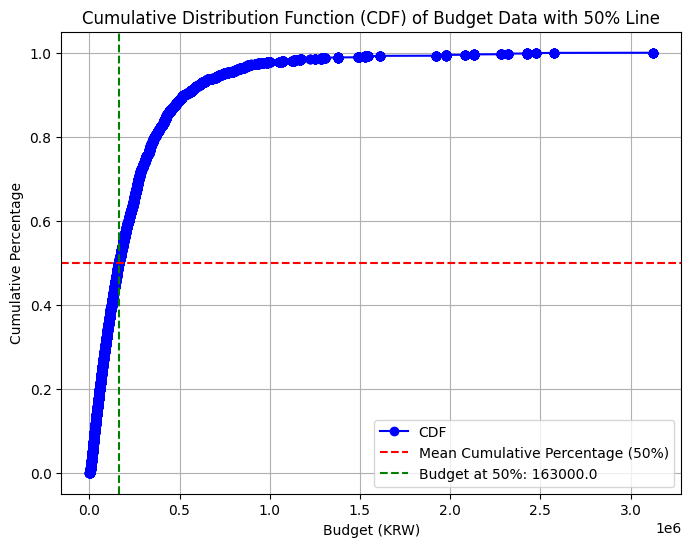

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 예산 데이터 정렬 (사용자의 df_dr['budget']을 가정)
budget_data_sorted = df_dr['budget'].sort_values().reset_index(drop=True)

# 누적 분포 비율 계산
cdf = np.arange(1, len(budget_data_sorted) + 1) / len(budget_data_sorted)

# 중위수 (50% 누적 비율에 해당하는 예산 금액) 계산
median_budget_index = np.argmax(cdf >= 0.5)
median_budget_value = budget_data_sorted.iloc[median_budget_index]

# CDF 그래프에 수평선과 수직선 추가
plt.figure(figsize=(8, 6))
plt.plot(budget_data_sorted, cdf, marker='o', linestyle='-', color='b', label='CDF')
plt.axhline(y=0.5, color='r', linestyle='--', label='Mean Cumulative Percentage (50%)')  # 50% 수평선
plt.axvline(x=median_budget_value, color='g', linestyle='--', label=f'Budget at 50%: {median_budget_value}')  # 중위수 수직선
plt.title("Cumulative Distribution Function (CDF) of Budget Data with 50% Line")
plt.xlabel("Budget (KRW)")
plt.ylabel("Cumulative Percentage")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df_dr['budget'].describe()

,budget
count,3.233300e+04
mean,2.471616e+05
std,2.899613e+05
min,7.000000e+02
25%,7.215000e+04
50%,1.630000e+05
75%,3.137000e+05
max,3.125157e+06


In [ ]:
import pandas as pd

# 각 사분위수 값 설정
q25 = 7.215000e+04
q50 = 1.630000e+05
q75 = 3.137000e+05

# 구간 설정
df_dr['budget_range'] = pd.cut(df_dr['budget'], bins=[0, q25, q50, q75, df_dr['budget'].max()],
                               labels=['0-25%', '25%-50%', '50%-75%', '75%-100%'])

# 각 구간에 속하는 데이터의 분포 계산
distribution = df_dr['budget_range'].value_counts(normalize=True) * 100

# 결과 출력
print(distribution)

budget_range
0-25%       25.027062
25%-50%     25.014691
75%-100%    24.996134
50%-75%     24.962113
Name: proportion, dtype: float64


* 11만원 -> 20만원.
* 10만원 -> 10만원 ?
* 9만원 -> 10만원.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


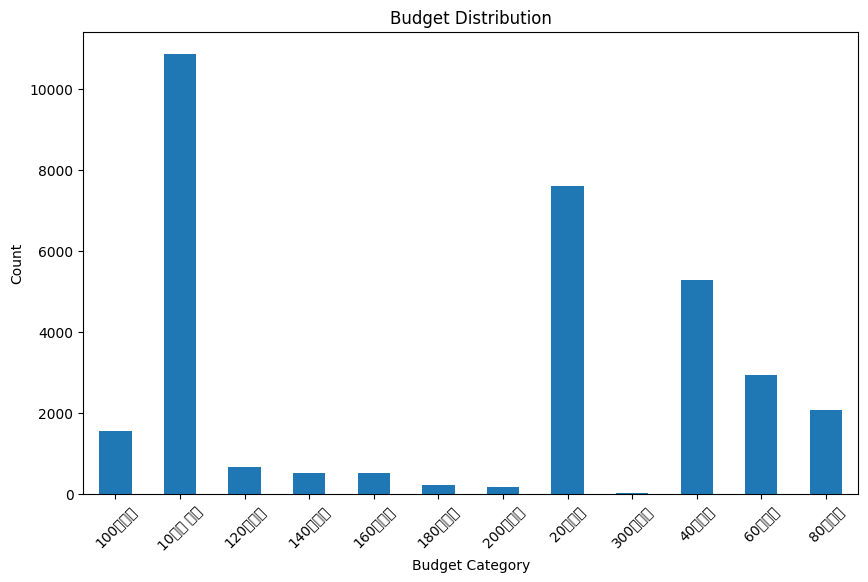

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터프레임
# df_dr = pd.DataFrame({'budget': ...})

# 구간별 라벨 지정 함수
def categorize_budget(budget):
    if budget < 100000:
        return '10만원 미만'
    elif budget < 1000000:
        # 10만원 단위로 범주화
        return f'{int(budget // 100000) * 20}만원대'
    else:
        # 100만원 단위로 범주화
        return f'{int(budget // 1000000) * 100}만원대'

# budget 컬럼을 범주화
df_dr['budget_category'] = df_dr['budget'].apply(categorize_budget)

# 범주별 데이터 분포 계산
distribution = df_dr['budget_category'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
distribution.plot(kind='bar')
plt.title('Budget Distribution')
plt.xlabel('Budget Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.loc[df_dr['budget'] >= 160000].shape

(16391, 21)

In [ ]:
df.loc[df_dr['budget'] < 160000].shape

(15942, 21)

* 16만원으로 업 앤 다운 결정하는 것은 어떤지.
* 아니면 25단위로 100 구간이 만들어지게. (100만원 이상시 '100만원 이상' 으로 대체.)
* 22만원을 기준으로 20만원 단위로 쪼개는 것은 ?

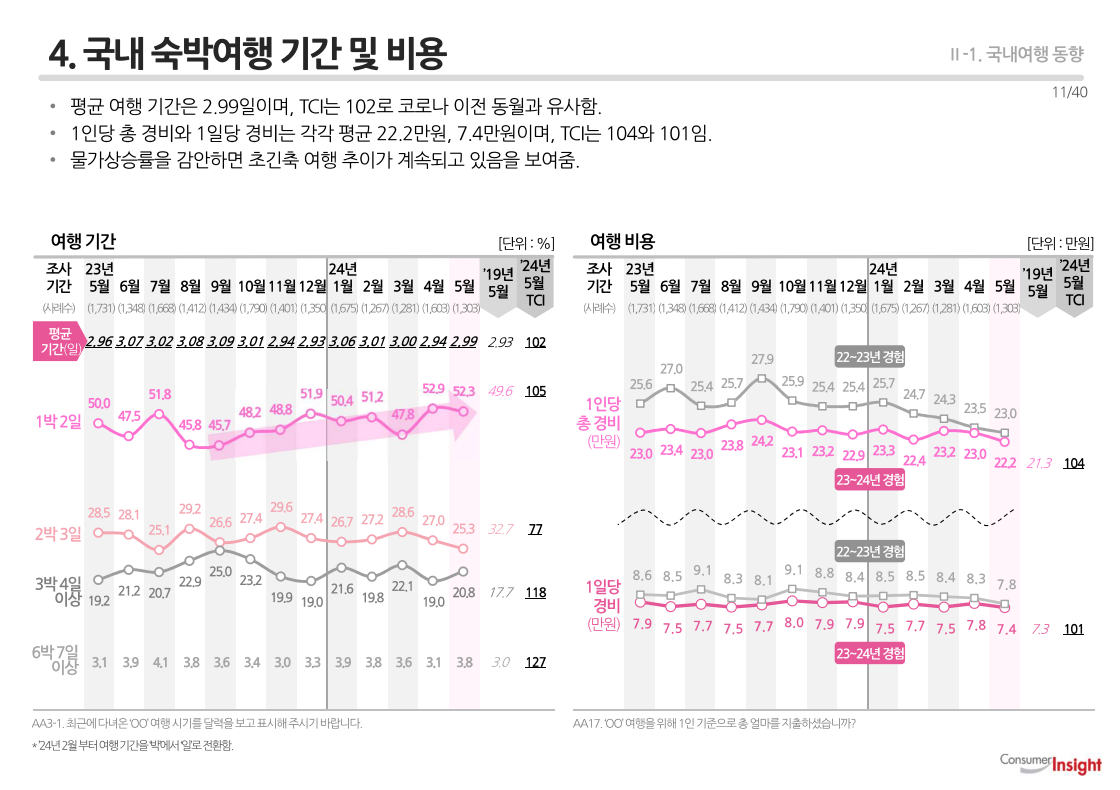

In [ ]:
df_dr['budget_category'].value_counts()

,count
budget_category,
10만원 미만,10869
20만원대,7591
40만원대,5272
60만원대,2932
80만원대,2075
100만원대,1557
120만원대,652
160만원대,506
140만원대,502


In [ ]:
df.groupby('TRAVEL_PERIOD')['budget'].mean()

,budget
TRAVEL_PERIOD,
1,60905.612806
2,176539.144715
3,281545.700253
4,473300.135419
5,567580.601757
6,765804.807780
7,676148.765073
8,725571.389439


In [ ]:
df.groupby('TRAVEL_MONTH')['budget'].mean()

,budget
TRAVEL_MONTH,
4,209014.337838
5,308283.379560
6,308162.317653
7,308566.237500
8,302892.867314
9,191311.392105
10,197156.990196
11,203177.734848
